In [1]:
from lib.models import AlexNet, VGG16, IRV2
import numpy as np
import tensorflow as tf
import json
import pandas as pd

In [2]:
def get_model_memory_usage(batch_size, model):
    import numpy as np
    try:
        from keras import backend as K
    except:
        from tensorflow.keras import backend as K

    shapes_mem_count = 0
    internal_model_mem_count = 0
    for l in model.layers:
        layer_type = l.__class__.__name__
        if layer_type == 'Model':
            internal_model_mem_count += get_model_memory_usage(batch_size, l)
        single_layer_mem = 1
        out_shape = l.output_shape
        if type(out_shape) is list:
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in model.trainable_weights])
    non_trainable_count = np.sum([K.count_params(p) for p in model.non_trainable_weights])

    number_size = 4.0
    if K.floatx() == 'float16':
        number_size = 2.0
    if K.floatx() == 'float64':
        number_size = 8.0

    total_memory = number_size * (batch_size * shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3) + internal_model_mem_count
    return gbytes

In [12]:
get_model_memory_usage(32, AlexNet((227,227,3), 48).build_model())

0.688

In [8]:
get_model_memory_usage(32, VGG16((224,224,3), 48).build_model())

2.321

In [10]:
get_model_memory_usage(32, IRV2((299,299,3), 48, "softmax", .5, .5, .5).build_model())

7.05

In [2]:
AlexNet = tf.keras.models.load_model("lib/models/AlexNet_Final")
VGG16 = tf.keras.models.load_model("lib/models/VGG16_Final")
IRV2 = tf.keras.models.load_model("lib/models/IRV2_Final1")

In [6]:
X_val = np.load("lib/datasets/X_val_alexnet1.npy")
X_val.shape

(1307, 227, 227, 3)

In [2]:
X_train = np.load("lib/datasets/X_train_alexnet1.npy")
X_val = np.load("lib/datasets/X_val_alexnet1.npy")
y_train_e = np.load("lib/datasets/y_train_e_alexnet1.npy")
y_val_e = np.load("lib/datasets/y_val_e_alexnet1.npy")
model = AlexNet(X_train.shape[1:], 48).build_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])
callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1,
    mode='max', min_delta=0.0001, cooldown=2, min_lr=0)
epoch = 50
history = model.fit(X_train, y_train_e, batch_size=32, epochs=epoch, validation_data=(X_val, y_val_e), callbacks = [callback])
model.save("lib/models/AlexNet1_Final")


Epoch 1/50
129/129 [==============================] - 20s 76ms/step - loss: 2.9449 - accuracy: 0.2487 - val_loss: 2.5594 - val_accuracy: 0.3158 - lr: 0.0010
Epoch 2/50
129/129 [==============================] - 7s 54ms/step - loss: 2.5819 - accuracy: 0.3158 - val_loss: 2.3715 - val_accuracy: 0.3567 - lr: 0.0010
Epoch 3/50
129/129 [==============================] - 7s 52ms/step - loss: 2.4668 - accuracy: 0.3382 - val_loss: 2.2834 - val_accuracy: 0.3720 - lr: 0.0010
Epoch 4/50
129/129 [==============================] - 7s 53ms/step - loss: 2.3688 - accuracy: 0.3589 - val_loss: 2.1996 - val_accuracy: 0.3939 - lr: 0.0010
Epoch 5/50
129/129 [==============================] - 7s 53ms/step - loss: 2.2980 - accuracy: 0.3756 - val_loss: 2.1251 - val_accuracy: 0.4085 - lr: 0.0010
Epoch 6/50
129/129 [==============================] - 7s 52ms/step - loss: 2.2004 - accuracy: 0.3939 - val_loss: 2.0534 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 7/50
129/129 [==============================] - 7s 53ms/s

INFO:tensorflow:Assets written to: lib/models/AlexNet_Final\assets


TypeError: Object of type History is not JSON serializable

In [2]:
X_train = np.load("lib/datasets/X_train_alexnet1.npy")
X_val = np.load("lib/datasets/X_val_alexnet1.npy")
y_train_e = np.load("lib/datasets/y_train_e_alexnet1.npy")
y_val_e = np.load("lib/datasets/y_val_e_alexnet1.npy")
model = AlexNet(X_train.shape[1:], 48).build_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])
callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1,
    mode='max', min_delta=0.0001, cooldown=2, min_lr=0)
epoch = 50
history = model.fit(X_train, y_train_e, batch_size=32, epochs=epoch, validation_data=(X_val, y_val_e), callbacks = [callback])
model.save("lib/models/AlexNet1_Final")
tmp = pd.DataFrame.from_dict(history.history)
tmp.to_csv("lib/models/AlexNet1_history.csv")

Epoch 1/50
123/123 [==============================] - 23s 97ms/step - loss: 2.8667 - accuracy: 0.2729 - val_loss: 2.5416 - val_accuracy: 0.3221 - lr: 0.0010
Epoch 2/50
123/123 [==============================] - 6s 53ms/step - loss: 2.5311 - accuracy: 0.3407 - val_loss: 2.3946 - val_accuracy: 0.3466 - lr: 0.0010
Epoch 3/50
123/123 [==============================] - 6s 53ms/step - loss: 2.3961 - accuracy: 0.3596 - val_loss: 2.2601 - val_accuracy: 0.3703 - lr: 0.0010
Epoch 4/50
123/123 [==============================] - 7s 53ms/step - loss: 2.2794 - accuracy: 0.3820 - val_loss: 2.2139 - val_accuracy: 0.3611 - lr: 0.0010
Epoch 5/50
123/123 [==============================] - 6s 53ms/step - loss: 2.1894 - accuracy: 0.4002 - val_loss: 2.0878 - val_accuracy: 0.4277 - lr: 0.0010
Epoch 6/50
123/123 [==============================] - 6s 53ms/step - loss: 2.0942 - accuracy: 0.4239 - val_loss: 1.9835 - val_accuracy: 0.4384 - lr: 0.0010
Epoch 7/50
123/123 [==============================] - 6s 53ms/s

In [7]:
tmp = pd.DataFrame.from_dict(history.history)
tmp.to_csv("lib/models/AlexNet_history.csv")

In [3]:
X_train = np.load("lib/datasets/X_train_vgg1.npy")
X_val = np.load("lib/datasets/X_val_vgg1.npy")
y_train_e = np.load("lib/datasets/y_train_e_vgg1.npy")
y_val_e = np.load("lib/datasets/y_val_e_vgg1.npy")
model = VGG16(X_train.shape[1:], 48).build_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])
callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1,
    mode='max', min_delta=0.0001, cooldown=2, min_lr=0)
epoch = 50
history = model.fit(X_train, y_train_e, batch_size=32, epochs=epoch, validation_data=(X_val, y_val_e), callbacks = [callback])
model.save("lib/models/VGG1_Final")
tmp = pd.DataFrame.from_dict(history.history)
tmp.to_csv("lib/models/VGG1_history.csv")

Epoch 1/50
129/129 [==============================] - 53s 346ms/step - loss: 3.0305 - accuracy: 0.2285 - val_loss: 2.6236 - val_accuracy: 0.3085 - lr: 0.0010
Epoch 2/50
129/129 [==============================] - 39s 303ms/step - loss: 2.6669 - accuracy: 0.2998 - val_loss: 2.4736 - val_accuracy: 0.3450 - lr: 0.0010
Epoch 3/50
129/129 [==============================] - 38s 298ms/step - loss: 2.5569 - accuracy: 0.3185 - val_loss: 2.3948 - val_accuracy: 0.3567 - lr: 0.0010
Epoch 4/50
129/129 [==============================] - 39s 302ms/step - loss: 2.4981 - accuracy: 0.3311 - val_loss: 2.3812 - val_accuracy: 0.3669 - lr: 0.0010
Epoch 5/50
129/129 [==============================] - 39s 305ms/step - loss: 2.4302 - accuracy: 0.3438 - val_loss: 2.2879 - val_accuracy: 0.3450 - lr: 0.0010
Epoch 6/50
129/129 [==============================] - 39s 303ms/step - loss: 2.3708 - accuracy: 0.3479 - val_loss: 2.2123 - val_accuracy: 0.3662 - lr: 0.0010
Epoch 7/50
129/129 [==============================] 

In [3]:
X_train = np.load("lib/datasets/X_train_vgg1.npy")
X_val = np.load("lib/datasets/X_val_vgg1.npy")
y_train_e = np.load("lib/datasets/y_train_e_vgg1.npy")
y_val_e = np.load("lib/datasets/y_val_e_vgg1.npy")
model = VGG16(X_train.shape[1:], 48).build_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])
callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1,
    mode='max', min_delta=0.0001, cooldown=2, min_lr=0)
epoch = 50
history = model.fit(X_train, y_train_e, batch_size=32, epochs=epoch, validation_data=(X_val, y_val_e), callbacks = [callback])
model.save("lib/models/VGG1_Final")
tmp = pd.DataFrame.from_dict(history.history)
tmp.to_csv("lib/models/VGG1_history.csv")

Epoch 1/50
123/123 [==============================] - 62s 406ms/step - loss: 2.9498 - accuracy: 0.2484 - val_loss: 2.6119 - val_accuracy: 0.3137 - lr: 0.0010
Epoch 2/50
123/123 [==============================] - 37s 302ms/step - loss: 2.6078 - accuracy: 0.3247 - val_loss: 2.5250 - val_accuracy: 0.3374 - lr: 0.0010
Epoch 3/50
123/123 [==============================] - 40s 329ms/step - loss: 2.5233 - accuracy: 0.3341 - val_loss: 2.4348 - val_accuracy: 0.3451 - lr: 0.0010
Epoch 4/50
123/123 [==============================] - 39s 314ms/step - loss: 2.4580 - accuracy: 0.3377 - val_loss: 2.3817 - val_accuracy: 0.3435 - lr: 0.0010
Epoch 5/50
123/123 [==============================] - 38s 310ms/step - loss: 2.4012 - accuracy: 0.3540 - val_loss: 2.3530 - val_accuracy: 0.3688 - lr: 0.0010
Epoch 6/50
123/123 [==============================] - 38s 309ms/step - loss: 2.3499 - accuracy: 0.3601 - val_loss: 2.2572 - val_accuracy: 0.3734 - lr: 0.0010
Epoch 7/50
123/123 [==============================] 

In [2]:
vgg16 = pd.read_csv("lib/models/VGG1_history.csv")
alexnet = pd.read_csv("lib/models/AlexNet1_history.csv")
irv2 = pd.read_csv("lib/models/IRV2_h.csv")

In [3]:
val_irv2 = [max(irv2['val_accuracy']),np.argmax(irv2['val_accuracy'])]
val_alexnet = [max(alexnet['val_accuracy']),np.argmax(alexnet['val_accuracy'])]
val_VGG16 = [max(vgg16['val_accuracy']),np.argmax(vgg16['val_accuracy'])]
val_irv2[0], val_alexnet[0], val_VGG16[0]

(0.9770466685295104, 0.9342004656791688, 0.9556235671043396)

In [20]:
import matplotlib.pyplot as plt
def plot(irv2, alexnet, vgg16, accuracy):
    val_irv2 = [max(irv2[accuracy]),np.argmax(irv2[accuracy])]
    val_alexnet = [max(alexnet[accuracy]),np.argmax(alexnet[accuracy])]
    val_VGG16 = [max(vgg16[accuracy]),np.argmax(vgg16[accuracy])]

    x_ax = [0, 50]
    y_ax = [0.2, val_alexnet[0], val_VGG16[0],val_irv2[0], 1]

    plt.figure(0)



    plt.plot(val_alexnet[1], val_alexnet[0])
    #plt.plot([val_alexnet[1],val_alexnet[1]],[0, val_alexnet[0]], color= "#003f5c", linestyle=':')
    plt.plot([0,val_alexnet[1]],[val_alexnet[0], val_alexnet[0]], color= "#003f5c", linestyle=':')

    plt.plot(val_irv2[1],val_irv2[0])
    #plt.plot([val_irv2[1],val_irv2[1]],[0, val_irv2[0]], color= "#bc5090", linestyle=':')
    plt.plot([0,val_irv2[1]],[val_irv2[0], val_irv2[0]], color= "#bc5090", linestyle=':')

    plt.plot(val_VGG16[1],val_VGG16[0])
    #plt.plot([val_VGG16[1],val_VGG16[1]],[0, val_VGG16[0]], color="#ff764a", linestyle=':')
    plt.plot([0,val_VGG16[1]],[val_VGG16[0], val_VGG16[0]], color="#ff764a", linestyle=':')

    plt.plot(alexnet[accuracy], label='AlexNet', color= "#003f5c")
    plt.plot(vgg16[accuracy], label='VGG16', color= "#ff764a")
    plt.plot(irv2[accuracy], label='IRV2', color="#bc5090")

    plt.ylim(.2,1)
    plt.xlim(0, 50)

    plt.gcf().set_size_inches(14,7)
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.xticks(x_ax)
    plt.ylabel('accuracy')
    plt.yticks(y_ax)
    plt.legend()

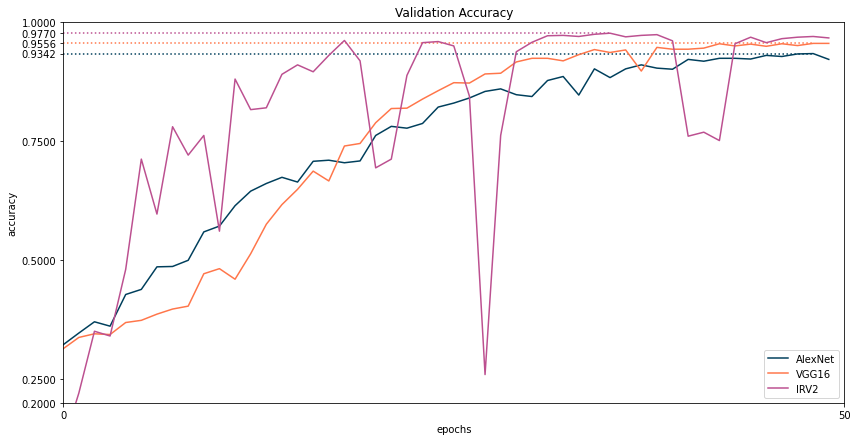

In [4]:
import matplotlib.pyplot as plt
accuracy = "val_accuracy"
val_irv2 = [max(irv2[accuracy]),np.argmax(irv2[accuracy])]
val_alexnet = [max(alexnet[accuracy]),np.argmax(alexnet[accuracy])]
val_VGG16 = [max(vgg16[accuracy]),np.argmax(vgg16[accuracy])]

x_ax = [0, 50]
y_ax = [0.2, .25, .5,.75, val_alexnet[0], val_VGG16[0],val_irv2[0], 1]

plt.figure(0)

# ax = plt.axes()
# ax.set_facecolor("#282C35")
plt.plot(val_alexnet[1], val_alexnet[0])
#plt.plot([val_alexnet[1],val_alexnet[1]],[0, val_alexnet[0]], color= "#003f5c", linestyle=':')
plt.plot([0,val_alexnet[1]],[val_alexnet[0], val_alexnet[0]], color= "#003f5c", linestyle=':')

plt.plot(val_irv2[1],val_irv2[0])
#plt.plot([val_irv2[1],val_irv2[1]],[0, val_irv2[0]], color= "#bc5090", linestyle=':')
plt.plot([0,val_irv2[1]],[val_irv2[0], val_irv2[0]], color= "#bc5090", linestyle=':')

plt.plot(val_VGG16[1],val_VGG16[0])
#plt.plot([val_VGG16[1],val_VGG16[1]],[0, val_VGG16[0]], color="#ff764a", linestyle=':')
plt.plot([0,val_VGG16[1]],[val_VGG16[0], val_VGG16[0]], color="#ff764a", linestyle=':')

plt.plot(alexnet[accuracy], label='AlexNet', color= "#003f5c")
plt.plot(vgg16[accuracy], label='VGG16', color= "#ff764a")
plt.plot(irv2[accuracy], label='IRV2', color="#bc5090")

plt.ylim(.2,1)
plt.xlim(0, 50)

plt.gcf().set_size_inches(14,7)
plt.title('Validation Accuracy')
plt.xlabel('epochs')
plt.xticks(x_ax)
plt.ylabel('accuracy')
plt.yticks(y_ax)
plt.legend()
plt.savefig("lib/models/accuracy_figs/val_acc.png")

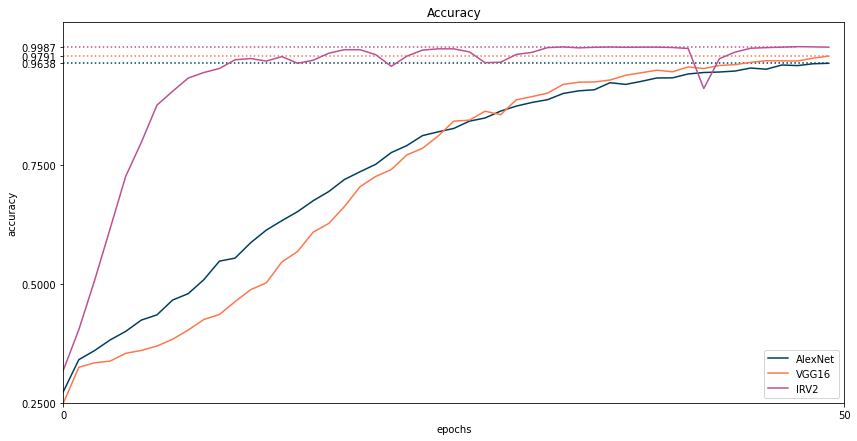

In [36]:
accuracy = "accuracy"
val_irv2 = [max(irv2[accuracy]),np.argmax(irv2[accuracy])]
val_alexnet = [max(alexnet[accuracy]),np.argmax(alexnet[accuracy])]
val_VGG16 = [max(vgg16[accuracy]),np.argmax(vgg16[accuracy])]

x_ax = [0, 50]
y_ax = [0.25, .5, .75, val_alexnet[0], val_VGG16[0],val_irv2[0]]

plt.figure(0)



plt.plot(val_alexnet[1], val_alexnet[0])
#plt.plot([val_alexnet[1],val_alexnet[1]],[0, val_alexnet[0]], color= "#003f5c", linestyle=':')
plt.plot([0,val_alexnet[1]],[val_alexnet[0], val_alexnet[0]], color= "#003f5c", linestyle=':')

plt.plot(val_irv2[1],val_irv2[0])
#plt.plot([val_irv2[1],val_irv2[1]],[0, val_irv2[0]], color= "#bc5090", linestyle=':')
plt.plot([0,val_irv2[1]],[val_irv2[0], val_irv2[0]], color= "#bc5090", linestyle=':')

plt.plot(val_VGG16[1],val_VGG16[0])
#plt.plot([val_VGG16[1],val_VGG16[1]],[0, val_VGG16[0]], color="#ff764a", linestyle=':')
plt.plot([0,val_VGG16[1]],[val_VGG16[0], val_VGG16[0]], color="#ff764a", linestyle=':')

plt.plot(alexnet[accuracy], label='AlexNet', color= "#003f5c")
plt.plot(vgg16[accuracy], label='VGG16', color= "#ff764a")
plt.plot(irv2[accuracy], label='IRV2', color="#bc5090")

plt.ylim(.25,1.05)
plt.xlim(0, 50)

plt.gcf().set_size_inches(14,7)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.xticks(x_ax)
plt.ylabel('accuracy')
plt.yticks(y_ax)
plt.legend()

In [30]:
accuracy = "loss"
val_irv2 = [max(irv2[accuracy]),np.argmax(irv2[accuracy])]
val_alexnet = [max(alexnet[accuracy]),np.argmax(alexnet[accuracy])]
val_VGG16 = [max(vgg16[accuracy]),np.argmax(vgg16[accuracy])]
print(val_irv2[0], val_alexnet[0], val_VGG16[0])

2.8101086616516118 2.866699457168579 2.9497828483581543


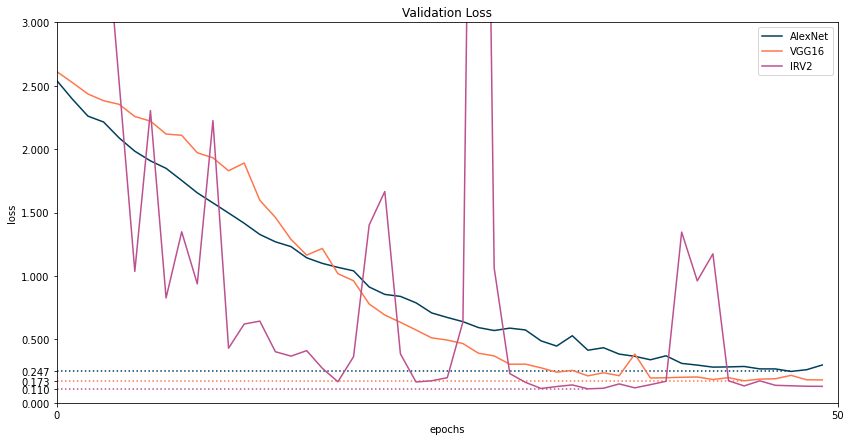

In [33]:
accuracy = "val_loss"
val_irv2 = [min(irv2[accuracy]),np.argmin(irv2[accuracy])]
val_alexnet = [min(alexnet[accuracy]),np.argmin(alexnet[accuracy])]
val_VGG16 = [min(vgg16[accuracy]),np.argmin(vgg16[accuracy])]

x_ax = [0, 50]
y_ax = [0, val_alexnet[0], val_VGG16[0],val_irv2[0],.5,1,1.5,2,2.5,3]

plt.figure(0)


plt.plot(val_alexnet[1], val_alexnet[0])
#plt.plot([val_alexnet[1],val_alexnet[1]],[0, val_alexnet[0]], color= "#003f5c", linestyle=':')
plt.plot([0,val_alexnet[1]],[val_alexnet[0], val_alexnet[0]], color= "#003f5c", linestyle=':')

plt.plot(val_irv2[1],val_irv2[0])
#plt.plot([val_irv2[1],val_irv2[1]],[0, val_irv2[0]], color= "#bc5090", linestyle=':')
plt.plot([0,val_irv2[1]],[val_irv2[0], val_irv2[0]], color= "#bc5090", linestyle=':')

plt.plot(val_VGG16[1],val_VGG16[0])
#plt.plot([val_VGG16[1],val_VGG16[1]],[0, val_VGG16[0]], color="#ff764a", linestyle=':')
plt.plot([0,val_VGG16[1]],[val_VGG16[0], val_VGG16[0]], color="#ff764a", linestyle=':')

plt.plot(alexnet[accuracy], label='AlexNet', color= "#003f5c")
plt.plot(vgg16[accuracy], label='VGG16', color= "#ff764a")
plt.plot(irv2[accuracy], label='IRV2', color="#bc5090")

plt.ylim(0,3)
plt.xlim(0, 50)

plt.gcf().set_size_inches(14,7)
plt.title('Validation Loss')
plt.xlabel('epochs')
plt.xticks(x_ax)
plt.ylabel('loss')
plt.yticks(y_ax)
plt.legend()

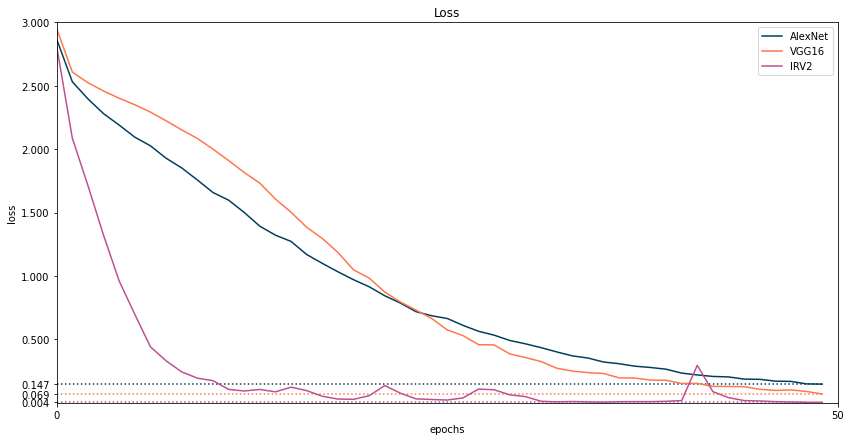

In [5]:
accuracy = "loss"
val_irv2 = [min(irv2[accuracy]),np.argmin(irv2[accuracy])]
val_alexnet = [min(alexnet[accuracy]),np.argmin(alexnet[accuracy])]
val_VGG16 = [min(vgg16[accuracy]),np.argmin(vgg16[accuracy])]

x_ax = [0, 50]
y_ax = [val_alexnet[0], val_VGG16[0],val_irv2[0],.5,1,1.5,2,2.5,3]

plt.figure(0)


plt.plot(val_alexnet[1], val_alexnet[0])
#plt.plot([val_alexnet[1],val_alexnet[1]],[0, val_alexnet[0]], color= "#003f5c", linestyle=':')
plt.plot([0,val_alexnet[1]],[val_alexnet[0], val_alexnet[0]], color= "#003f5c", linestyle=':')

plt.plot(val_irv2[1],val_irv2[0])
#plt.plot([val_irv2[1],val_irv2[1]],[0, val_irv2[0]], color= "#bc5090", linestyle=':')
plt.plot([0,val_irv2[1]],[val_irv2[0], val_irv2[0]], color= "#bc5090", linestyle=':')

plt.plot(val_VGG16[1],val_VGG16[0])
#plt.plot([val_VGG16[1],val_VGG16[1]],[0, val_VGG16[0]], color="#ff764a", linestyle=':')
plt.plot([0,val_VGG16[1]],[val_VGG16[0], val_VGG16[0]], color="#ff764a", linestyle=':')

plt.plot(alexnet[accuracy], label='AlexNet', color= "#003f5c")
plt.plot(vgg16[accuracy], label='VGG16', color= "#ff764a")
plt.plot(irv2[accuracy], label='IRV2', color="#bc5090")

plt.ylim(0,3)
plt.xlim(0, 50)

plt.gcf().set_size_inches(14,7)
plt.title('Loss')
plt.xlabel('epochs')
plt.xticks(x_ax)
plt.ylabel('loss')
plt.yticks(y_ax)
plt.legend()

In [2]:
AlexNet = tf.keras.models.load_model("lib/models/AlexNet1_Final")
VGG16 = tf.keras.models.load_model("lib/models/VGG1_Final")
IRV2 = tf.keras.models.load_model("lib/models/IRV2_Final2")

In [3]:
X_test_a = np.load("lib/datasets/X_test_alexnet1.npy")
X_test_v = np.load("lib/datasets/X_test_vgg1.npy")
X_test_i = np.load("lib/datasets/X_test_irv21.npy")
y_test_a = np.load("lib/datasets/y_test_e_alexnet1.npy")
y_test_v = np.load("lib/datasets/y_test_e_vgg1.npy")
y_test_i = np.load("lib/datasets/y_test_e_irv21.npy")

In [4]:
from sklearn import metrics
y_pred1 = np.argmax(AlexNet.predict(X_test_a),axis=1)
print("AlexNet Accuracy:",metrics.accuracy_score(y_test_a, y_pred1))
y_pred2 = np.argmax(VGG16.predict(X_test_v),axis=1)
print("VGG16 Accuracy:",metrics.accuracy_score(y_test_v, y_pred2))
y_pred3 = np.argmax(IRV2.predict(X_test_i),axis=1)
print("Inception Resnet V2 Accuracy:",metrics.accuracy_score(y_test_i, y_pred3))

AlexNet Accuracy: 0.9273700305810397
VGG16 Accuracy: 0.9602446483180428
Inception Resnet V2 Accuracy: 0.9671253822629969


In [6]:
y_pred2, y_test_v

(array([36, 36, 36, ..., 36, 36, 13], dtype=int64),
 array([36, 36, 36, ..., 36, 36, 13]))

In [8]:
y_pred3, y_test_i

(array([36, 36, 36, ..., 36, 36, 13], dtype=int64),
 array([36, 36, 36, ..., 36, 36, 13]))

In [11]:

for i in range(len(y_pred3)):
    if y_pred3[i] != y_test_i[i]:
        print(i, y_test_i[i])

1 24
41 32
51 1
70 43
122 10
124 13
140 11
253 24
329 10
341 13
370 35
389 35
434 8
450 24
549 35
579 36
581 23
585 10
586 27
660 36
703 24
727 43
765 37
793 10
847 2
902 36
907 35
940 9
944 37
959 13
967 0
1015 41
1059 1
1061 2
1076 35
1084 29
1100 24
1153 29
1170 27
1182 13
1198 35
1204 8
1208 8


In [12]:
for i in y_test_i:
    if i == 0:
        print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


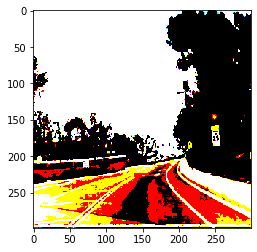

In [12]:
tmp = X_test_i[6]
from matplotlib import pyplot as plt
plt.imshow(tmp, interpolation="nearest")
plt.show()

In [6]:
path = "lib/datasets/LISA/"
all_ann = pd.read_csv("lib/datasets/LISA/allAnnotations.csv", delimiter=';')
all_ann = all_ann.drop_duplicates(subset=["Filename"], keep=False, ignore_index=True)
test = 0
import random
sub_sample = np.load("lib/datasets/sample.npy")  # The data set is too big for my PC
names = []

for i in range(len(all_ann["Filename"])):
    file = all_ann["Filename"][i]
    names.append(path+file)

# 1k random samples of images with no signs
with open("lib/datasets/LISA/negatives/negatives.dat") as f:
    negatives = [line.rstrip('\n') for line in f]
path_n = "lib/datasets/LISA/negatives/"
import random
sub_sample = np.load("lib/datasets/sample_negative.npy")
for i in sub_sample:
    file = negatives[i]
    names.append(path+file)
names = np.array(names)
s = np.arange(len(names))
np.random.seed(43)
np.random.shuffle(s)
names = names[s]

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
names_train, names_test = train_test_split(names, test_size=0.2, random_state=1)
names_train, names_val = train_test_split(names_train, test_size=0.25, random_state=1)

In [10]:
for i in bad:
    print(names_test[i])

lib/datasets/LISA/vid10/frameAnnotations-MVI_0122.MOV_annotations/signalAhead_1324866992.avi_image19.png
lib/datasets/LISA/vid4/frameAnnotations-vid_cmp2.avi_annotations/speedLimit_1323821504.avi_image24.png
lib/datasets/LISA/vid3/frameAnnotations-vid_cmp2.avi_annotations/addedLane_1323820177.avi_image1.png
lib/datasets/LISA/aiua120306-1/frameAnnotations-DataLog02142012_003_external_camera.avi_annotations/turnRight_1333397687.avi_image6.png
lib/datasets/LISA/vid11/frameAnnotations-MVI_0123.MOV_annotations/merge_1324867161.avi_image1.png
lib/datasets/LISA/aiua120214-0/frameAnnotations-DataLog02142012_external_camera.avi_annotations/stop_1330545935.avi_image12.png
lib/datasets/LISA/aiua120306-0/frameAnnotations-DataLog02142012_002_external_camera.avi_annotations/keepRight_1333393387.avi_image5.png
lib/datasets/LISA/vid5/frameAnnotations-vid_cmp2.avi_annotations/signalAhead_1323823192.avi_image2.png
lib/datasets/LISA/vid11/frameAnnotations-MVI_0123.MOV_annotations/merge_1324867161.avi_ima

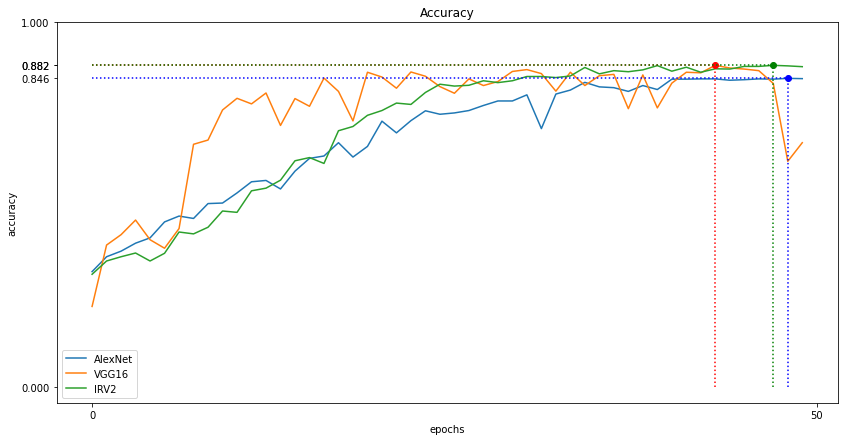

In [9]:
import matplotlib.pyplot as plt
import numpy as np

val_irv2 = [max(irv2['val_accuracy']),np.argmax(irv2['val_accuracy'])]
val_alexnet = [max(alexnet['val_accuracy']),np.argmax(alexnet['val_accuracy'])]
val_VGG16 = [max(VGG16['val_accuracy']),np.argmax(VGG16['val_accuracy'])]

x_ax = [0, 50]
y_ax = [0, val_alexnet[0], val_VGG16[0],val_irv2[0], 1]

plt.figure(0)

plt.plot(alexnet['val_accuracy'], label='AlexNet')
plt.plot(irv2['val_accuracy'], label='VGG16')
plt.plot(VGG16['val_accuracy'], label='IRV2')

plt.plot(val_alexnet[1], val_alexnet[0], 'bo')
plt.plot([val_alexnet[1],val_alexnet[1]],[0, val_alexnet[0]],':b')
plt.plot([0,val_alexnet[1]],[val_alexnet[0], val_alexnet[0]],':b')

plt.plot(val_irv2[1],val_irv2[0], 'ro')
plt.plot([val_irv2[1],val_irv2[1]],[0, val_irv2[0]],':r')
plt.plot([0,val_irv2[1]],[val_irv2[0], val_irv2[0]],':r')

plt.plot(val_VGG16[1],val_VGG16[0], 'go')
plt.plot([val_VGG16[1],val_VGG16[1]],[0, val_VGG16[0]],':g')
plt.plot([0,val_VGG16[1]],[val_VGG16[0], val_VGG16[0]],':g')

plt.gcf().set_size_inches(14,7)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.xticks(x_ax)
plt.ylabel('accuracy')
plt.yticks(y_ax)
plt.legend()